In [3]:
#Import libraries
from sklearn import preprocessing
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import operator
import seaborn as sns

# seaborn graphing parameters
sns.set_style("whitegrid")
sns.set_palette("BuGn_r")
sns.set(font_scale=1.5) 

#ml algos
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

pd.options.display.max_rows = 30
pd.options.display.max_columns = 30

## This dataset measures data from Austin's BCycle program from December 2013 through June 2019.

In [2]:
#import csv for Austin B-Cycle Trip data
bcycle = pd.read_csv('Austin_B-Cycle_Trips.csv', encoding='latin1')
#bcycle = pd.read_pickle('./Austin_B-Cycle_Trips.pkl')
#bcycle.to_pickle('./Austin_B-Cycle_Trips.pkl')

/Users/jakegrosek/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Section I - CITY OF AUSTIN B-CYCLE BIKE RENTAL PROGRAM

## Before the dataset is altered, there are 1,171,610 recorded trips. This value will be used to calculate just how many of the rows dropped after the dataset is cleaned. 

In [4]:
len(bcycle)

1171610

In [5]:
# original number of trips
num_trips = 1171610
print("There are {} trips in this dataset".format(num_trips))

There are 1171610 trips in this dataset


In [6]:
# data clean columns: 
bcycle.columns = bcycle.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

## For redundencies, we can drop Year and Month since the Checkout Date has the full date

In [7]:
bcycle.drop(['month', 'year'], 1, inplace=True)

## Sum of NaN's

In [8]:
# here we see the number of NaN's in the data set.
# I want to see if the sum of NaN's is < 5%.
bcycle.isnull().sum()

trip_id                      0
membership_type           6463
bicycle_id                 723
checkout_date                0
checkout_time                0
checkout_kiosk_id        23154
checkout_kiosk               0
return_kiosk_id          24423
return_kiosk                 0
trip_duration_minutes        0
dtype: int64

In [9]:
# instantiating the sum of all original NaN values
sum_of_bcycle_nans = 6463+723+23154+24423
sum_of_bcycle_nans

54763

## Knowing that all the NaN values total < 5% of the data is good to know in case it make sense to drop them for expediency. If the t-tests results are problematic, reinvestigating the source of the NaN's is an identified area of improvement.

In [10]:
# 4.67% of the daata is NaN
sum_of_bcycle_nans / num_trips

0.04674166318143409

## Bicycle_id has some floating characters that need to be cleaned

In [11]:
# convert column to string
bcycle['bicycle_id'] = bcycle.bicycle_id.astype(str)

In [12]:
bcycle.bicycle_id.apply(lambda x: type(x)).value_counts()

<class 'str'>    1171610
Name: bicycle_id, dtype: int64

## Remove additional characters

In [13]:
bcycle['bicycle_id'] = bcycle['bicycle_id'].str.replace('G', '')

In [14]:
bcycle['bicycle_id'] = bcycle['bicycle_id'].str.replace('B', '')

In [15]:
bcycle['bicycle_id'] = bcycle['bicycle_id'].str.replace('E', '')
bcycle.bicycle_id.value_counts()

951.0    1896
387.0    1861
885.0    1855
925.0    1852
80.0     1844
         ... 
195         3
165         2
805         2
974         1
980         1
Name: bicycle_id, Length: 1008, dtype: int64

In [16]:
bcycle['bicycle_id'] = bcycle.bicycle_id.astype(float)

In [17]:
bcycle['bicycle_id'].value_counts

<bound method IndexOpsMixin.value_counts of 0           207.0
1           969.0
2           214.0
3           745.0
4           164.0
            ...  
1171605     451.0
1171606      62.0
1171607     473.0
1171608     461.0
1171609    2197.0
Name: bicycle_id, Length: 1171610, dtype: float64>

In [18]:
#confirmed there are 723 NaN values out of 1.17 M (0.0006% of the data)
nan_bicycle_id = bcycle.bicycle_id.isnull().sum(axis=0)
nan_bicycle_id_percent = nan_bicycle_id / num_trips # num trips is 1,171,610
print("There are {} rides with NaN values out of {} total rides, which is equal to {}."
      .format(nan_bicycle_id, num_trips, nan_bicycle_id_percent))

There are 723 rides with NaN values out of 1171610 total rides, which is equal to 0.0006170995467775113.


## Dropping the NaN rides since they're only .06% of the data

In [19]:
bcycle = bcycle.dropna(axis=0, subset=['bicycle_id'])

In [20]:
# create a variable for the number of dropped bcycle_ids
dropped_bcycle_id = 723

## The return and checkout kiosk ID's need to be cleaned as well

In [21]:
# both kiosk dtypes are floats. With such a large data set, 
# I'm getting concerned with processing time and memory.
bcycle.dtypes

trip_id                    int64
membership_type           object
bicycle_id               float64
checkout_date             object
checkout_time             object
checkout_kiosk_id        float64
checkout_kiosk            object
return_kiosk_id          float64
return_kiosk              object
trip_duration_minutes      int64
dtype: object

## Total number of NaN's in the kiosk id's

In [22]:
# confirmed 23,131 NaN values out of 1.17 M (1.9% of the data)
nan_checkout_k = bcycle.checkout_kiosk_id.isnull().sum(axis=0)
nan_checkout_kiosk_id_percent = nan_checkout_k / num_trips
print("There are {} rides with NaN values out of {} total rides, \
    which is equal to {}."
      .format(nan_checkout_k, num_trips, nan_checkout_kiosk_id_percent))

There are 23131 rides with NaN values out of 1171610 total rides,     which is equal to 0.019742917865159908.


In [23]:
# confirmed 23,131 NaN values out of 1.17 M (2.08% of the data)
nan_return_k = bcycle.return_kiosk_id.isnull().sum(axis=0)
nan_return_kiosk_id_percent = nan_return_k / num_trips
print("There are {} rides with NaN values out of {} total rides, \
    which is equal to {} percent of the dataframe."
      .format(nan_return_k, num_trips, nan_return_kiosk_id_percent))

There are 24390 rides with NaN values out of 1171610 total rides,     which is equal to 0.020817507532369987 percent of the dataframe.


In [24]:
# creating a variable for the number of dropped rows with NaN kiosk ID's
nan_sum_ids = bcycle.apply(lambda row: True if pd.isnull(row['checkout_kiosk_id'])
             or pd.isnull(row['return_kiosk_id']) else False, axis='columns')
nan_sum_ids.sum()
var_sum_ids = nan_sum_ids.sum()

In [25]:
# 42, 420 rows of data with NaN's in either set of kiosk id's
var_sum_ids

42430

In [26]:
# instantiating the value
dropped_kiosk_ids = 42430

## Dropping these rows for now, which account for 3.6% of the data

In [27]:
# confirmed 42,430 NaN values out of 1.17 M (3.62% of the data)
percent_kiosks_dropped = var_sum_ids / num_trips
print("There are {} uniquw rows dropped from a total of {}, which is {} percent of the dataset."
      .format(var_sum_ids, num_trips, percent_kiosks_dropped))

There are 42430 uniquw rows dropped from a total of 1171610, which is 0.036215122779764596 percent of the dataset.


In [28]:
# drop the rows with NaN's in the kiosk id's columns
bcycle = bcycle.dropna(axis=0, subset=['checkout_kiosk_id', 'return_kiosk_id'])

## Finally, membership_type has a few NaN's as well

In [31]:
# confirmed 6,366 NaN values out of 1.17 M (0.54% of the data)
nan_membership_type = bcycle.membership_type.isnull().sum(axis=0)
nan_membership_type_percent = nan_membership_type / num_trips
print("There are {} rides with NaN values out of {} total rides, which is equal to {}."
      .format(nan_membership_type, num_trips, nan_membership_type_percent))

There are 6366 rides with NaN values out of 1171610 total rides, which is equal to 0.005433548706480826.


In [32]:
# dropping the NaN rows in membership_type
bcycle = bcycle.dropna(axis=0, subset=['membership_type'])

## Convert checkout_date to a standardized to_datetime

In [37]:
#bcycle['checkout_date'] = pd.to_datetime(bcycle['checkout_date'])

## There is also a mismatch betweent the number of unique Return & Checkout Kiosk and the corresponding ID's

In [38]:
bcycle['checkout_kiosk_id'].nunique()

96

In [39]:
bcycle['checkout_kiosk'].nunique()

100

In [40]:
bcycle['return_kiosk_id'].nunique()

96

In [41]:
bcycle['return_kiosk'].nunique()

99

# Addressing Memory Constraints

In [33]:
bcycle.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122091 entries, 0 to 1171609
Data columns (total 10 columns):
trip_id                  1122091 non-null int64
membership_type          1122091 non-null object
bicycle_id               1122091 non-null float64
checkout_date            1122091 non-null object
checkout_time            1122091 non-null object
checkout_kiosk_id        1122091 non-null float64
checkout_kiosk           1122091 non-null object
return_kiosk_id          1122091 non-null float64
return_kiosk             1122091 non-null object
trip_duration_minutes    1122091 non-null int64
dtypes: float64(3), int64(2), object(5)
memory usage: 437.7 MB


## A quick calculation of the average memory usage per column shows is 65.81 MB !

In [34]:
# memory calc for B cycles data set
for dtype in ['float','int','object']:
    selected_dtype = bcycle.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
print("Average memory usage for {} columns: {:03.2f}MB".format(dtype,mean_usage_mb))

Average memory usage for object columns: 65.81MB


In [35]:
int_types = ["uint8", "int8", "int16"]
for it in int_types:
    print(np.iinfo(it))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------



In [37]:
# Created a function to save time
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series 
        usage_b = pandas_obj.memory_usage(deep=True)
        # convert bytes to megabytes
    usage_mb = usage_b / 1024 ** 2
    return usage_mb

In [38]:
bcycle_int = bcycle.select_dtypes(include=['int'])
converted_int = bcycle_int.apply(pd.to_numeric,downcast='unsigned')
print(mem_usage(bcycle_int))
print(mem_usage(converted_int))
compare_ints = pd.concat([bcycle_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

25.68262481689453
19.2619686126709


,before,after
uint16,NaN,1.0
int64,2.0,NaN
uint64,NaN,1.0


# Downcasting columns

In [39]:
# see which dtypes each column is
bcycle.dtypes

trip_id                    int64
membership_type           object
bicycle_id               float64
checkout_date             object
checkout_time             object
checkout_kiosk_id        float64
checkout_kiosk            object
return_kiosk_id          float64
return_kiosk              object
trip_duration_minutes      int64
dtype: object

In [40]:
bcycle['trip_id'] = pd.to_numeric(bcycle['trip_id'], 
                                  errors='ignore', downcast='integer')

In [41]:
bcycle['bicycle_id'] = pd.to_numeric(bcycle['bicycle_id'], 
                                     errors='ignore', downcast='integer')

In [42]:
bcycle['checkout_kiosk_id'] = pd.to_numeric(bcycle['checkout_kiosk_id'], 
                                            errors='ignore', downcast='integer')

In [43]:
bcycle['return_kiosk_id'] = pd.to_numeric(bcycle['return_kiosk_id'], 
                                          errors='ignore', downcast='integer')

In [44]:
bcycle['trip_duration_minutes'] = pd.to_numeric(bcycle['trip_duration_minutes'], 
                                                errors='ignore', downcast='integer')

In [45]:
# after the downcast, these columns have been reduced
# to their smallest possible integer size.
bcycle.dtypes

trip_id                   int64
membership_type          object
bicycle_id                int16
checkout_date            object
checkout_time            object
checkout_kiosk_id         int16
checkout_kiosk           object
return_kiosk_id           int16
return_kiosk             object
trip_duration_minutes     int16
dtype: object

## Add column measuring time in seconds to match Dockless dataset

In [46]:
bcycle['trip_duration_seconds'] = bcycle['trip_duration_minutes'] * 60

In [47]:
bcycle.head(2)

,trip_id,membership_type,bicycle_id,checkout_date,checkout_time,checkout_kiosk_id,checkout_kiosk,return_kiosk_id,return_kiosk,trip_duration_minutes,trip_duration_seconds
0,9900285854,Annual (San Antonio B-cycle),207,10/26/2014,13:12:00,2537,West & 6th St.,2707,Rainey St @ Cummings,76,4560
1,9900285855,24-Hour Kiosk (Austin B-cycle),969,10/26/2014,13:12:00,2498,Convention Center / 4th St. @ MetroRail,2566,Pfluger Bridge @ W 2nd Street,58,3480


## Convert to positive time to eliminate negative time errors

In [48]:
bcycle['trip_duration_seconds'] = bcycle['trip_duration_seconds'].abs()

In [49]:
bcycle['trip_duration_minutes'] = bcycle['trip_duration_minutes'].abs()

## Eliminate whitespaces in kiosk_ids

In [50]:
bcycle['checkout_kiosk'] = bcycle['checkout_kiosk'].str.strip()
bcycle['return_kiosk'] = bcycle['return_kiosk'].str.strip()
pd.set_option('display.max_rows', 150)
bcycle.sort_values(by=['checkout_kiosk']).checkout_kiosk.unique()

array(['10th & Red River', '11th & Salina', '11th & San Jacinto',
       '13th & San Antonio', '17th & Guadalupe', '21st & Speedway @PCL',
       '21st & University', '22nd & Pearl', '23rd & Rio Grande',
       '23rd & San Jacinto @ DKR Stadium', '2nd & Congress', '3rd & West',
       '4th & Congress', '5th & Bowie', '5th & Campbell',
       '5th & San Marcos', '6th & Chalmers', '6th & Congress',
       '6th & Navasota St.', '8th & Congress', '8th & Guadalupe',
       '8th & Lavaca', 'ACC - Rio Grande & 12th',
       'ACC - West & 12th Street', 'Barton Springs & Riverside',
       'Barton Springs @ Kinney Ave', 'Barton Springs Pool',
       'Boardwalk West', 'Brazos & 6th',
       'Bullock Museum @ Congress & MLK',
       'Capital Metro HQ - East 5th at Broadway',
       'Capitol Station / Congress & 11th', 'City Hall / Lavaca & 2nd',
       'Congress & Cesar Chavez', 'Convention Center / 3rd & Trinity',
       'Convention Center / 4th St. @ MetroRail',
       'Davis at Rainey Street',

## Create a Unix timestamp

In [51]:
bcycle["unix_checkout_time"] = bcycle["checkout_date"].map(str) + " " + bcycle["checkout_time"]

In [53]:
# set the parameter for how the date is being interpretted
merge_time = datetime.strptime('04/29/2019 05:30:00', '%m/%d/%Y %H:%M:%S')

# how i want the time coverted to (seconds)
merge_time.strftime('%s')

# define unix timestamp function
def bcycle_to_timestamp(str):
    merge_time = datetime.strptime(str, '%m/%d/%Y %H:%M:%S')
    return merge_time.strftime('%s')

# test that it worked
bcycle_to_timestamp('04/29/2019 05:30:00')
bcycle['unix_checkout_time'] = bcycle.unix_checkout_time.apply(bcycle_to_timestamp)

## Create Hour Feature

In [54]:
# create new column for hour
bcycle['hour'] = bcycle['checkout_time']

# set the parameter for how the date is being interpretted
hour_feature = datetime.strptime('05:30:00', '%H:%M:%S')

# how i want the time coverted to (hour)
hour_feature.strftime('%H')

# define unix timestamp function
def bcycle_to_hour(str):
    hour_feature = datetime.strptime(str, '%H:%M:%S')
    return hour_feature.strftime('%H')

bcycle['hour'] = bcycle.hour.apply(bcycle_to_hour)

## Create Month Feature

In [55]:
# create new column for month
bcycle['month'] = bcycle['checkout_date']

# set the parameter for how the date is being interpretted
month_feature = datetime.strptime('04/29/2019', '%m/%d/%Y')

# how i want the time coverted to (hour)
month_feature.strftime('%m')

# define unix timestamp function
def bcycle_to_month(str):
    month_feature = datetime.strptime(str, '%m/%d/%Y')
    return month_feature.strftime('%m')

bcycle['month'] = bcycle.month.apply(bcycle_to_month)

## Create Year Feature

In [56]:
# create new column for year
bcycle['year'] = bcycle['checkout_date']

# set the parameter for how the date is being interpretted
year_feature = datetime.strptime('04/29/2019', '%m/%d/%Y')

# how i want the time coverted to (year)
year_feature.strftime('%Y')

# define unix timestamp function
def bcycle_to_year(str):
    year_feature = datetime.strptime(str, '%m/%d/%Y')
    return year_feature.strftime('%Y')

bcycle['year'] = bcycle.year.apply(bcycle_to_year)

## Create Day of Week

In [57]:
from datetime import datetime
# create new column for day of week
bcycle['day_of_week'] = bcycle['checkout_date']

# set the parameter for how the date is being interpretted
weekday_feature = datetime.strptime('04/29/2019', '%m/%d/%Y')

# how i want the time coverted to (year)
weekday_feature.strftime('%w')

# define unix timestamp function
def bcycle_to_weekday(str):
    weekday_feature = datetime.strptime(str, '%m/%d/%Y')
    return weekday_feature.strftime('%w')

bcycle['day_of_week'] = bcycle.day_of_week.apply(bcycle_to_weekday)

## Downcast new columns to integers

In [58]:
# convert to integer
bcycle['unix_checkout_time'] = pd.to_numeric(bcycle['unix_checkout_time'], errors='ignore', downcast='integer')
bcycle['hour'] = pd.to_numeric(bcycle['hour'], errors='ignore', downcast='integer')
bcycle['month'] = pd.to_numeric(bcycle['month'], errors='ignore', downcast='integer')
bcycle['year'] = pd.to_numeric(bcycle['year'], errors='ignore', downcast='integer')
bcycle['day_of_week'] = pd.to_numeric(bcycle['day_of_week'], errors='ignore', downcast='integer')

## Drop redundant Checkout time & date

In [59]:
# drop checkout date 
bcycle.drop('checkout_date', 1, inplace=True)
# drop checkout time 
bcycle.drop('checkout_time', 1, inplace=True)

# Section II: Inspecting the BCycle data set

In [63]:
# longest ride
bcycle['trip_duration_minutes'].max()

10981

## As expected, the tail is too long to get a meaningful view of the distribution.

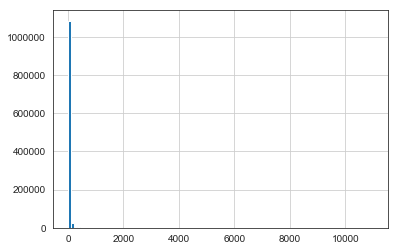

In [59]:
bcycle.trip_duration_minutes.hist(bins=100)

## According to the Austin BCycle website, no bike is supposed to be rented for more than 24 hours. Furthermore, "checkouts lasting longer than 60 minutes will be charged an additional fee of 4 dollars (plus tax) for each additional 30 minutes past the first hour of a checkout..."

source: https://austinbcycle.com/how-it-works/faqs 

## Assuming one did actually rent a bike for the full 24 hours, that would be an additional 199.18 dollars in fees after the first rental hour. That is a strong incentive to not have a bike ride last that long especially with other day-rental bike businesses available.

## For initial analysis, a 24-hour range will be used, which equals 1,440 minutes

## Dividing the range into four equal sections demonstrates between the 1.5-2 hour mark (90-120 minutes) is when the distributions flattens significantly. 

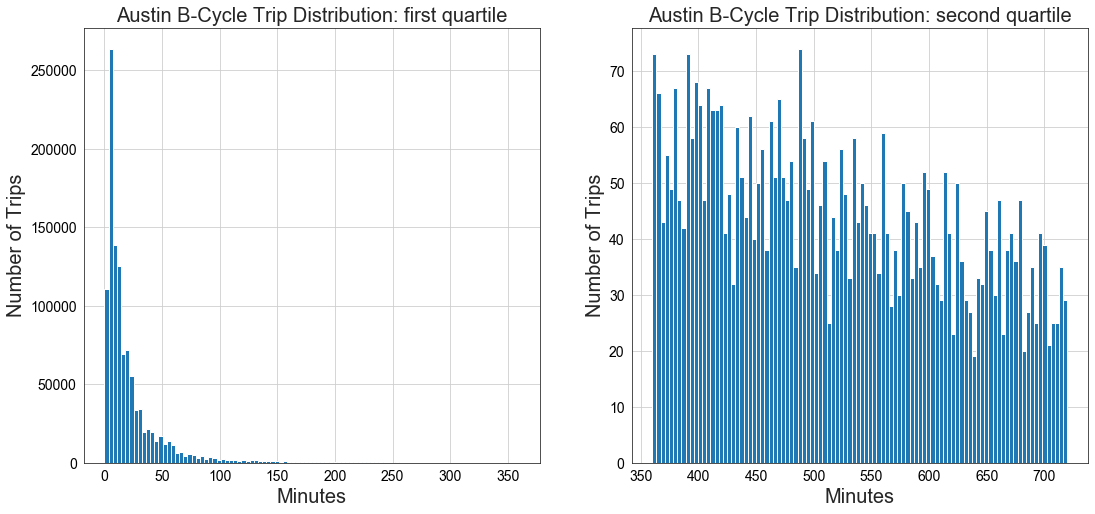

In [64]:
# first quartile subplot
plt.figure(figsize=[18,8])
plt.subplot(1, 2, 1, autoscale_on=True)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
plt.title("Austin B-Cycle Trip Distribution: first quartile",fontsize=20 )
plt.ylabel("Number of Trips",fontsize=20 ) 
plt.xlabel("Minutes",fontsize=20 )
plt.tick_params(labelsize=14,labelcolor="black")

# second quartile subplot
bcycle.trip_duration_minutes.hist(bins=100, range=(0, 360))
plt.subplot(1, 2, 2, autoscale_on=True)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
bcycle.trip_duration_minutes.hist(bins=100, range=(360, 720))
plt.title("Austin B-Cycle Trip Distribution: second quartile",fontsize=20 )
plt.ylabel("Number of Trips",fontsize=20 ) 
plt.xlabel("Minutes",fontsize=20 )
plt.tick_params(labelsize=14,labelcolor="black")

plt.show()

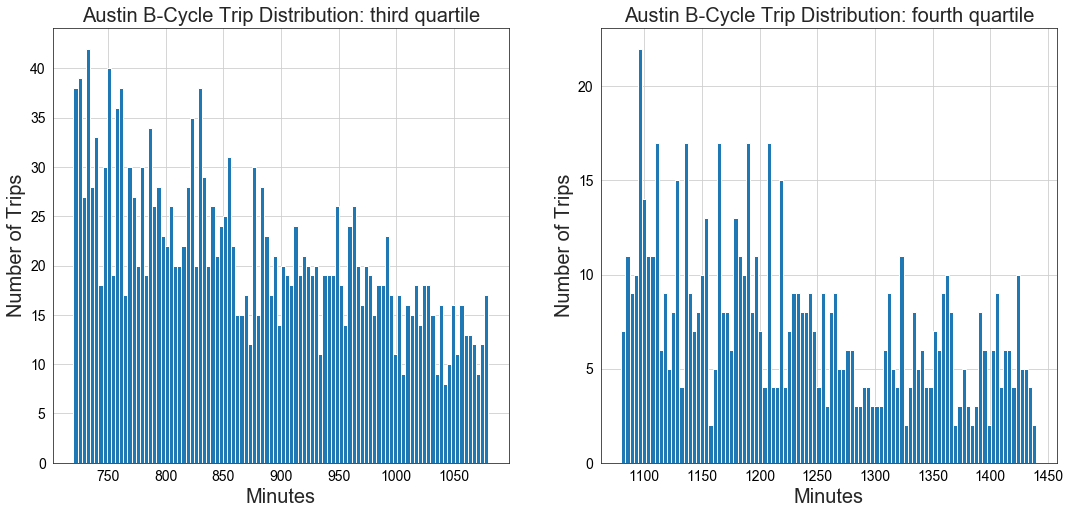

In [65]:
# third quartile subplot
plt.figure(figsize=[18,8])
plt.subplot(1, 2, 1, autoscale_on=True)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
plt.title("Austin B-Cycle Trip Distribution: third quartile",fontsize=20)
plt.ylabel("Number of Trips",fontsize=20) 
plt.xlabel("Minutes",fontsize=20)
plt.tick_params(labelsize=14,labelcolor="black")

# fourth quartile subplot
bcycle.trip_duration_minutes.hist(bins=100, range=(720, 1080))
plt.subplot(1, 2, 2, autoscale_on=True)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.title("Austin B-Cycle Trip Distribution: fourth quartile",fontsize=20)
plt.ylabel("Number of Trips",fontsize=20) 
plt.xlabel("Minutes",fontsize=20)
plt.tick_params(labelsize=14,labelcolor="black")

bcycle.trip_duration_minutes.hist(bins=100, range=(1080, 1440))
plt.show()

## How are the quartiles divided?

In [77]:
# variable to measure the range
first_quartile = bcycle.loc[(bcycle['trip_duration_minutes'] <= 350)]

# 99% of the data is in the first quartile
first_quartile_rate = len(first_quartile) / (len(bcycle))
first_quartile_rate

0.9930424537760306

In [81]:
# variable to measure the range
second_quartile = bcycle.loc[(bcycle['trip_duration_minutes'] > 350) &
                           (bcycle['trip_duration_minutes'] <= 700)]

second_quartile_rate = len(second_quartile) / (len(bcycle))
second_quartile_rate

0.003952442359844255

In [82]:
# variable to measure the range
third_quartile = bcycle.loc[(bcycle['trip_duration_minutes'] > 700) &
                           (bcycle['trip_duration_minutes'] <= 1050)]

# 99% of the data is in the third quartile
third_quartile_rate = len(third_quartile) / (len(bcycle))
third_quartile_rate

0.0019116096644568043

In [83]:
# variable to measure the range
fourth_quartile = bcycle.loc[(bcycle['trip_duration_minutes'] > 1050) &
                           (bcycle['trip_duration_minutes'] <= 1400)]

# 99% of the data is in the fourth quartile
fourth_quartile_rate = len(fourth_quartile) / (len(bcycle))
fourth_quartile_rate

0.0006942395937584385

## > 99% of the rides are in the first quartile ranging from 0-350 minutes (~5.8 hours)

# Observing "False Starts" in BCycle

## There does appear to be an amount of rides that went nowhere or lasted a very short increment of time lasting 0-2 minutes. In the Dockless data set, this indication is even more pronouced.

## Since the number of rides lasting 0-2 minutes is consistent, this will be used as a preliminary range to observe false starts. This range can be adjusted in the future for modeling purposes.

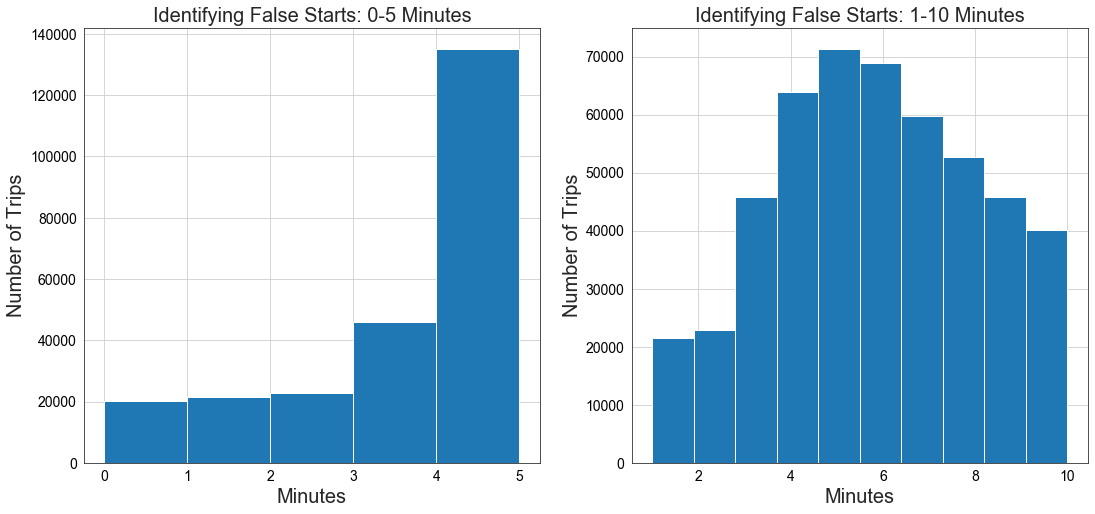

In [70]:
# 0-5 minutes
plt.figure(figsize=[18,8])
plt.subplot(1, 2, 1, autoscale_on=True)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
bcycle.trip_duration_minutes.hist(bins=5, range=(0, 5))
plt.title("Identifying False Starts: 0-5 Minutes",fontsize=20)
plt.ylabel("Number of Trips",fontsize=20) 
plt.xlabel("Minutes",fontsize=20)
plt.tick_params(labelsize=14,labelcolor="black")

# 1-5 minutes; the number of trips skyrockets after 2 minutes.
plt.subplot(1, 2, 2, autoscale_on=True)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
bcycle.trip_duration_minutes.hist(bins=10, range=(1, 10))
plt.title("Identifying False Starts: 1-10 Minutes",fontsize=20)
plt.ylabel("Number of Trips",fontsize=20) 
plt.xlabel("Minutes",fontsize=20)
plt.tick_params(labelsize=14,labelcolor="black")

plt.show()

## Since 99% of the data is in the first quartile, those rides will be used to compare "false starts" to the data. This can be adjusted in the modeling section to see how performance is affected when using only the first quartile or the entire data set. 

In [88]:
# variable to measure the number of trips less than 3 minutes long
fbr = bcycle.loc[(bcycle['trip_duration_minutes'] < 3)]

In [89]:
# percentage of false starts in the dataset
false_bcycle_rate = len(fbr) / (len(bcycle))
false_bcycle_rate

0.05764683969481976

In [90]:
# instantiating a portion of the data set for rides >= to 3 minutes
# and less than or equal to 350 minutes.
normal_bcycle_rides = bcycle.loc[(bcycle['trip_duration_minutes'] >= 3)
                                    & (bcycle['trip_duration_minutes'] <= 350)]

# Save the data set to a new csv and pkl file

In [5]:
#bcycle.to_csv('bcycle_cleaned')

#bcycle.to_pickle('./bcycle_cleaned.pkl')

# the below code is if needed to read the pkl file
bcycle = pd.read_pickle('./bcycle_cleaned.pkl')